# Factors that Influence Interest Rates
## by Sunny Ebinum

## Investigation Overview

The overall goal here is to explore interest rates and the factors/attributes that could influence interest rates. Overall, the attributes I considered were loan amount, loan term, employment (status and duration), income, home ownership and so on.

For this presentation, I'm looking at the relationship between loan amount and interest rates. And how it is affected by loan term. To summarize, interest rate appeared lowest for short term loans (12 months). However, this was more likely for small loan amounts. Larger loans had lower interest rates for mid-term and long-term loans.


## Dataset Overview

The Prosper loan dataset contains 113,937 loans with 81 variables on each loan. I chose to explore 13 variables. These includes the loan amount, term, borrower rate (or interest rate), current loan status, income, occupation, income verified, home ownership and so on. I performed missing values imputation as necessary and collapsed some categorical levels of some variables to clean the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Distribution of Borrower (Interest) Rates

The Borrower's rates takes a fairly symmetric shape and with most values pooling between 0.1 and 0.3. The highest point is around the 0.15 mark.  

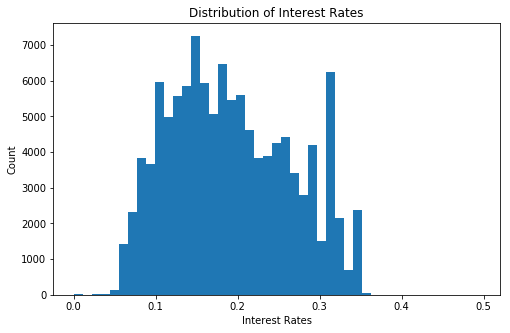

In [3]:
bins = np.arange(df.BorrowerRate.min(), df.BorrowerRate.max() + 0.001, 0.01 + 0.001)

plt.figure(figsize=(8, 5))
plt.hist(data=df, x='BorrowerRate', bins=bins)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rates')
plt.ylabel('Count');

## Distribution of Loan Amount

The loan amounts varied between 1000 and 40000 USD with most amounts pooling between 4000 - 10,000 USD. Originally, the distribution of loan amount is characterised by extremely large values. However, on a logarithmic scale, the distribution is relatively more symmetrical. **Note: 1k on the x axis of the plot represents a 1000 units.**

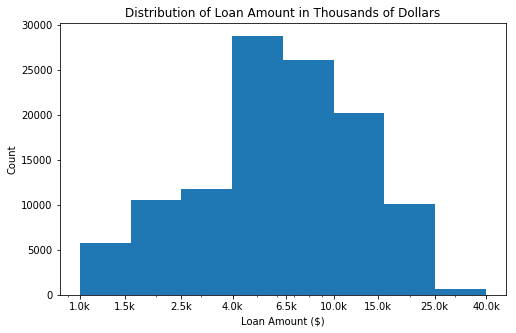

In [4]:
plt.figure(figsize=(8,5))

# The ticks for bins between [0 - maximum loan amount]
bins = 10 ** np.arange(3, 4.5+0.2, 0.2)
ticks = [1000, 1500, 2500, 4000, 6500, 10000, 15000, 25000, 40000]
labels = [f'{t/1000}k' for t in ticks]

# Plot a well-labelled histogram
plt.hist(data=df, x='LoanOriginalAmount', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount in Thousands of Dollars');

## Relationship Between Interest Rates and Loan Amount Characterized by Loan Term

Overall, The higher the original loan amount, the lower the interest rates. In the presence of loan term, larger loan amounts had more reduced interest rates for mid-term and long-term loans relative to short-term loans.

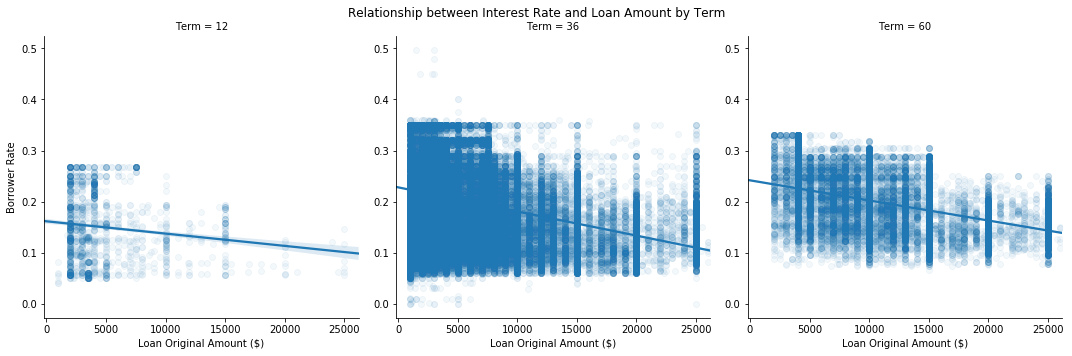

In [5]:
g = sb.FacetGrid(data = df, col = 'Term', size = 5)
g.map(sb.regplot,  'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.3, scatter_kws={'alpha': 1/20});
g.set_xlabels('Loan Original Amount ($)')
g.set_ylabels('Borrower Rate')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Interest Rate and Loan Amount by Term');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [8]:
# Use this command if you are running this file in local
# !jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt